In [6]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
c = iris.feature_names
df = pd.DataFrame(iris.data, columns=c)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


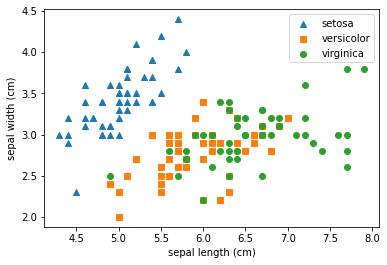

In [12]:
mkrs = ['^','s','o'] # 마커 세모, 네모, 동그라미로

for idx, mkr in enumerate(mkrs):
    x = df[df['target'] == idx][c[0]]
    y = df[df['target'] == idx][c[1]]
    plt.scatter(x, y, marker=mkr, label = iris.target_names[idx])

plt.legend()
plt.xlabel(c[0])
plt.ylabel(c[1])
plt.show()

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca = PCA(n_components=2)

pcapl = Pipeline([
    ('scaler',scaler),
    ('pca',pca)
])

iris_pca = pcapl.fit_transform(df.iloc[:,:-1])
iris_pca.shape # 2개 차원으로 축소됨


(150, 2)

In [19]:
c1 = ['pca_component_1','pca_component_2']
pcadf= pd.DataFrame(iris_pca, columns=c1)
pcadf['target'] = iris.target
pcadf.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


c:\Dev\Miniconda\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Dev\Miniconda\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Dev\Miniconda\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Dev\Miniconda

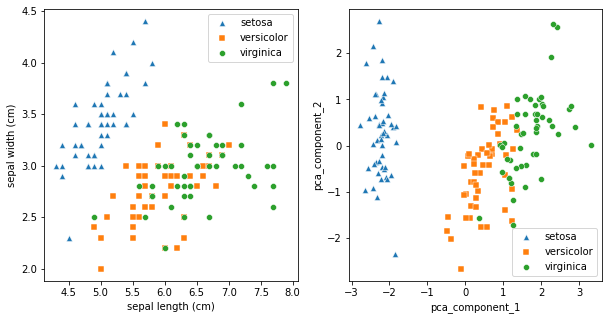

In [30]:
import seaborn as sns

fig, axes = plt.subplots(1,2,figsize = (10,5))

for idx, mkr in enumerate(mkrs):
    x = df[df['target'] == idx][c[0]]
    y = df[df['target'] == idx][c[1]]
    x1 = pcadf[pcadf['target'] == idx][c1[0]]
    y1 = pcadf[pcadf['target'] == idx][c1[1]]
    sns.scatterplot(x, y, marker=mkr, label = iris.target_names[idx], ax = axes[0])
    sns.scatterplot(x1, y1, marker=mkr, label = iris.target_names[idx], ax= axes[1])



차원축소를 통해 구성요소를 뽑아낸 것이, 기존의 sepal length/width 로 구분한 것보다 잘 분류하는 것을 확인할 수 있다

In [31]:
print(pca.explained_variance_ratio_) # 각 구성요소의 설명 비율

[0.72962445 0.22850762]


In [33]:
scaler = StandardScaler()
pca2 = PCA(n_components=3)

pcapl2 = Pipeline([
    ('scaler',scaler),
    ('pca',pca2)
])

iris_pca2 = pcapl2.fit_transform(df.iloc[:,:-1])
pca2.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

3개 속성으로 뽑으면 설명비율이 급격히 낮아진다